# Loading the needs Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import LabelEncoder

In [2]:
warnings.filterwarnings('ignore') 
%matplotlib inline

In [3]:
house_dataset = pd.read_csv('housing 2.csv')

## Type of data frame read from pandas Library

In [4]:
type(house_dataset)

pandas.core.frame.DataFrame

## The first 5 rows in the dataset

In [5]:
first_5_rows = house_dataset.head()
first_5_rows

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## The last 5 rows in the dataset

In [6]:
last_5_rows = house_dataset.tail()

In [7]:
pd.options.display.min_rows = 100

## The first 40 rows in the dataset

In [8]:
house_dataset.head(25).style.background_gradient(cmap='Reds')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


## Shown some statistical measurement

In [9]:
house_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## type of the data for each columns

In [10]:
house_dataset.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

## Shown some statistical measurement

In [11]:
house_dataset.describe().style.background_gradient(cmap='Greens')

,price,area,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4766729.247706,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1870439.615657,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1750000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3430000.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4340000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5740000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,13300000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


## Include non-numerical values for the statistical analysis


In [12]:
house_dataset.describe(include='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


## The max value for each columns

In [13]:
house_dataset.max()

price                  13300000
area                      16200
bedrooms                      6
bathrooms                     4
stories                       4
mainroad                    yes
guestroom                   yes
basement                    yes
hotwaterheating             yes
airconditioning             yes
parking                       3
prefarea                    yes
furnishingstatus    unfurnished
dtype: object

## The lowest value in each column in the datase

In [14]:
house_dataset.min()

price                 1750000
area                     1650
bedrooms                    1
bathrooms                   1
stories                     1
mainroad                   no
guestroom                  no
basement                   no
hotwaterheating            no
airconditioning            no
parking                     0
prefarea                   no
furnishingstatus    furnished
dtype: object

## The row of the house contains the highest number of rooms

In [15]:
house_dataset[house_dataset['bathrooms'] == house_dataset['bathrooms'].max()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


## The row of the house contains the lowest number of rooms

In [16]:
house_dataset[house_dataset['bathrooms'] == house_dataset['bathrooms'].min()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
20,8750000,4320,3,1,2,yes,no,yes,yes,no,2,no,semi-furnished
22,8645000,8050,3,1,1,yes,yes,yes,no,yes,1,no,furnished
27,8400000,8875,3,1,1,yes,no,no,no,no,1,no,semi-furnished
31,8400000,7000,3,1,4,yes,no,no,no,yes,2,no,semi-furnished
34,8120000,6840,5,1,2,yes,yes,yes,no,yes,1,no,furnished
38,7962500,6000,3,1,4,yes,yes,no,no,yes,2,no,unfurnished


## The price for the house contain the highest number of rooms

In [17]:
house_dataset[house_dataset['bedrooms'] == house_dataset['bathrooms'].max()]['price'].values[0]

13300000

## The total price for the house with the lowest number of rooms

In [18]:
house_dataset[house_dataset['bedrooms'] == house_dataset['bedrooms'].min()]['price'].values[0]

3150000

## The lowes house rooms in the dataset

In [19]:
house_dataset[house_dataset['bathrooms'] == house_dataset['bathrooms'].min()]['bedrooms'].values[0]

4

## The total of room in the house contains the highest number of rooms

In [20]:
house_dataset[house_dataset['bedrooms'] == house_dataset['bedrooms'].max()]['bedrooms'].values[0]

6

## The total null value in each column

In [21]:
house_dataset.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Check the shape of the dataset

In [22]:
house_dataset.shape

(545, 13)

## Calculate the percentage of the missing data

In [23]:
missing_percentage = (house_dataset.isna().sum().sum() / house_dataset.size) * 100

print(f'The percentage of the missing data is {missing_percentage:.2f}%')

The percentage of the missing data is 0.00%


## Get the total amount of missing data

In [24]:
print(f'The total amount of missing data is {house_dataset.isna().sum().sum()}')

The total amount of missing data is 0


## Cleaning the missing data

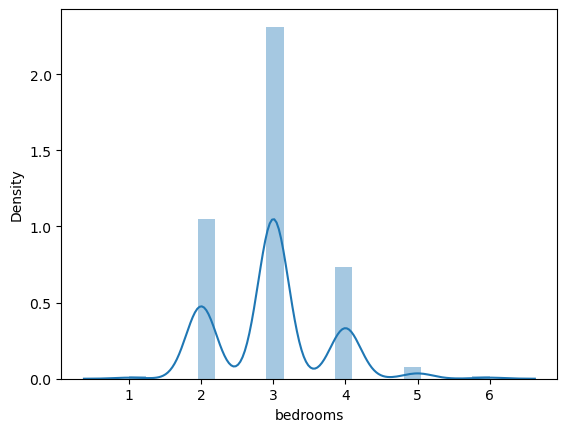

In [25]:
# display the skew to chech which statistical measurement stable for cleaning the missing data
sns.distplot(house_dataset['bedrooms'], )
plt.show()

## Replace the missing data with the mean value

In [26]:
house_dataset_df = house_dataset.fillna(house_dataset['bedrooms'].mean(), )
house_dataset_df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## The correlation between the numerical columns

In [27]:
Correlation = house_dataset_df.corr(numeric_only='numberic')

## constructing heatmap to understand the correlation between the columns

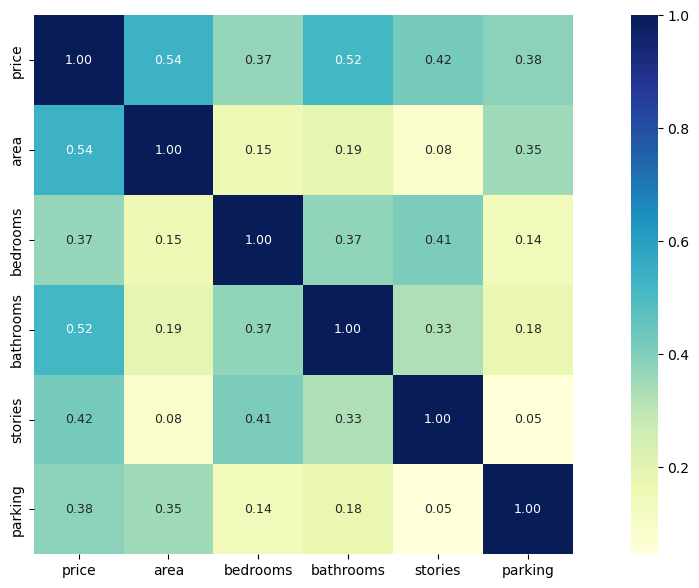

In [28]:
plt.figure(figsize=(15, 7))
sns.heatmap(Correlation, square=True, fmt='0.2f', cmap="YlGnBu", annot=True, annot_kws={'size':9}, cbar=True,)
plt.show()

## Display all the columns


In [29]:
house_dataset_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

## Histegram ploting for the columns that have higher correlations

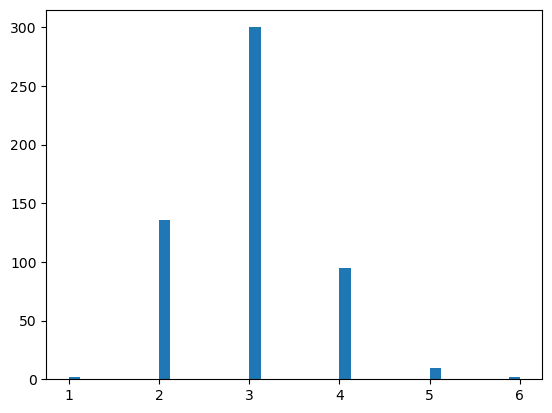

In [30]:
plt.hist(house_dataset_df['bedrooms'], bins=40)
plt.show()

In [31]:
house_dataset.head(1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished


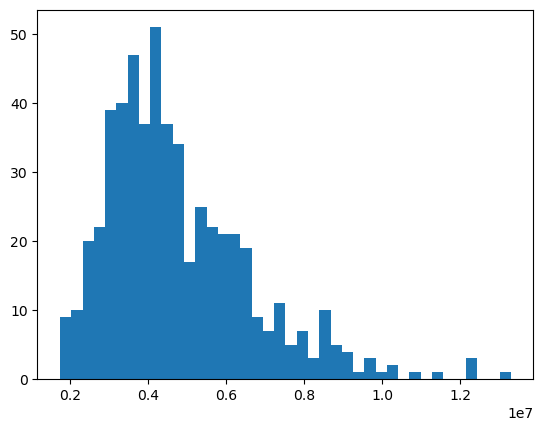

In [32]:
plt.hist(house_dataset_df['price'], bins=40)
plt.show()

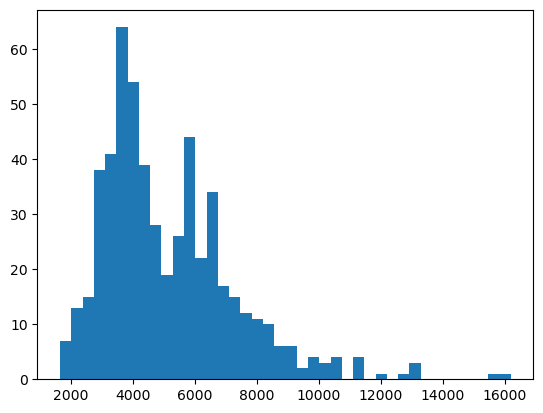

In [33]:
plt.hist(house_dataset_df['area'], bins=40)
plt.show()

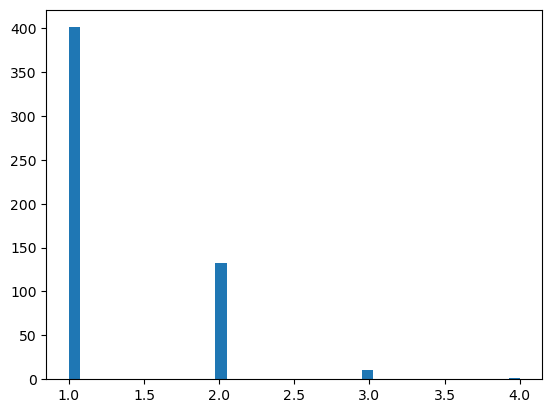

In [34]:
plt.hist(house_dataset_df['bathrooms'], bins=40)
plt.show()

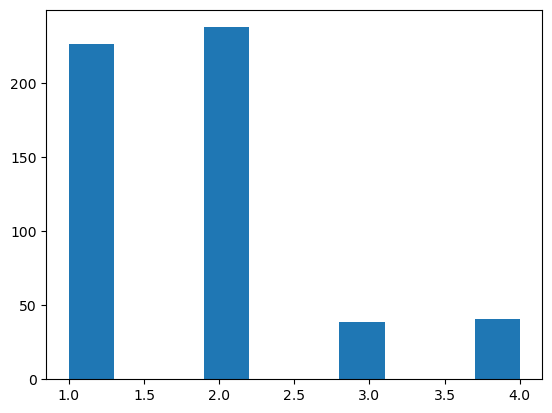

In [35]:
plt.hist(house_dataset_df['stories'])
plt.show()

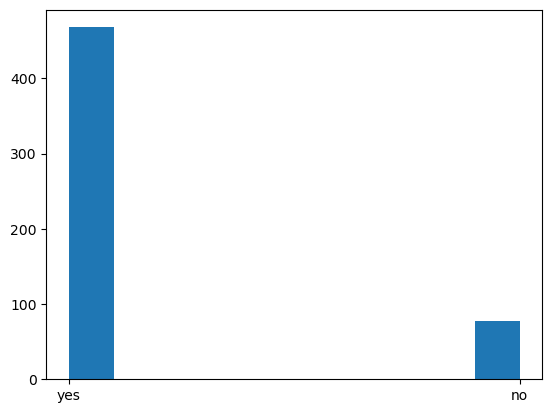

In [36]:
plt.hist(house_dataset_df['mainroad'])
plt.show()

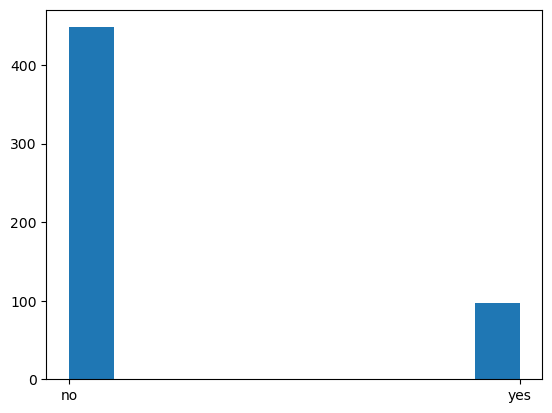

In [37]:
plt.hist(house_dataset_df['guestroom'])
plt.show() 

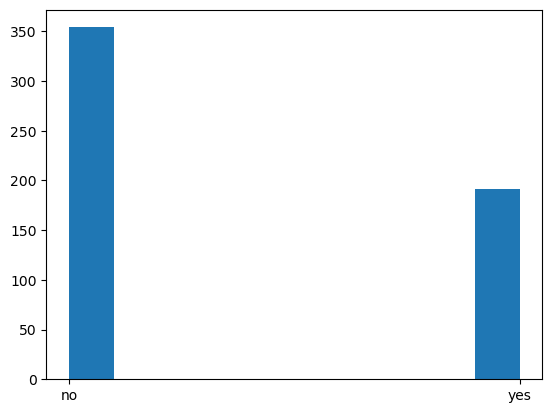

In [38]:
plt.hist(house_dataset_df['basement'])
plt.show()

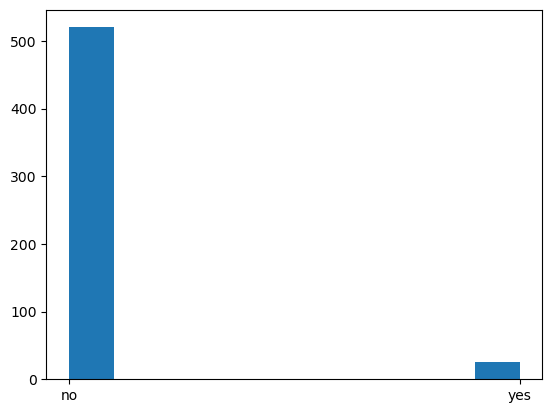

In [39]:
plt.hist(house_dataset_df['hotwaterheating'])
plt.show()

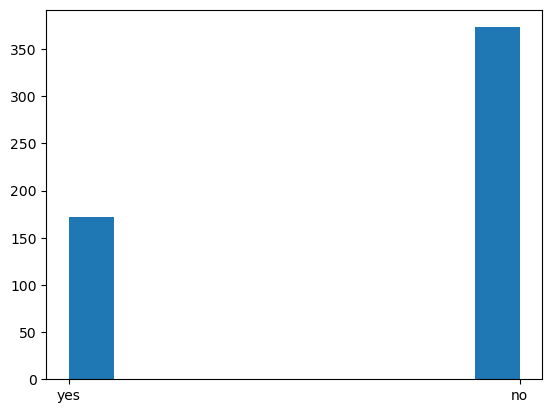

In [40]:
plt.hist(house_dataset_df['airconditioning'])
plt.show()

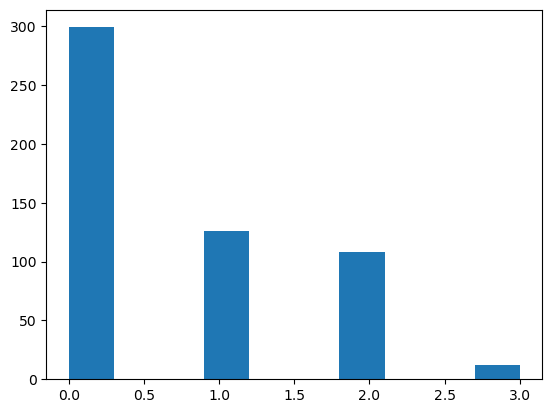

In [41]:
plt.hist(house_dataset_df['parking'])
plt.show()

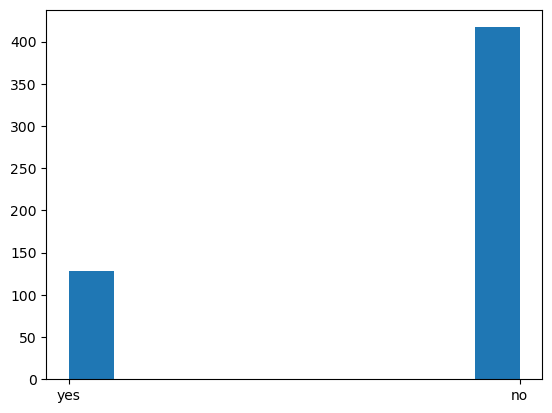

In [42]:
plt.hist(house_dataset_df['prefarea'])
plt.show()

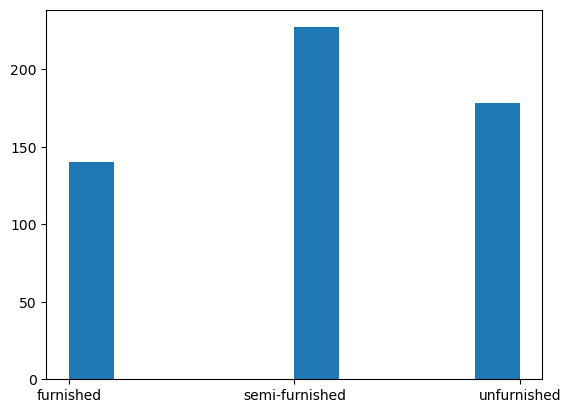

In [43]:
plt.hist(house_dataset_df['furnishingstatus'])
plt.show()

## Sprate the datainto train and test

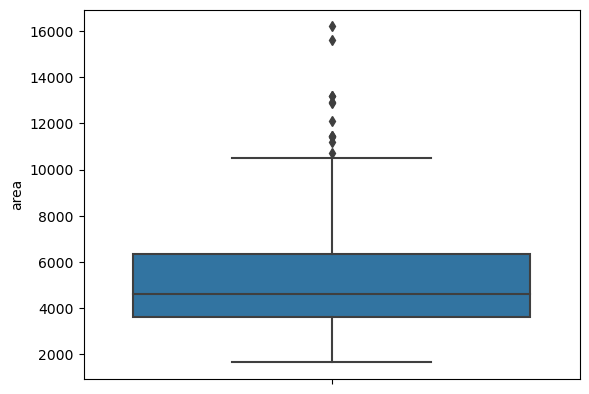

In [44]:
sns.boxplot(data=house_dataset, y="area")
plt.show()

Text(0, 0.5, 'price')

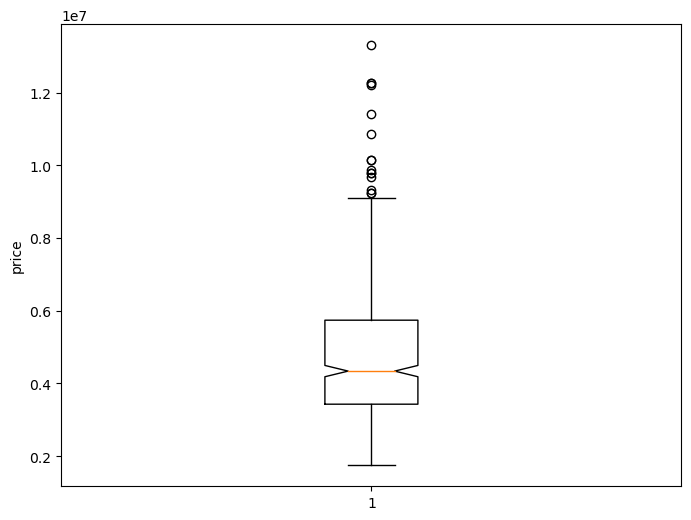

In [45]:
plt.figure(figsize=(8, 6))
plt.boxplot(x=house_dataset['price'], notch=True)
plt.ylabel('price')

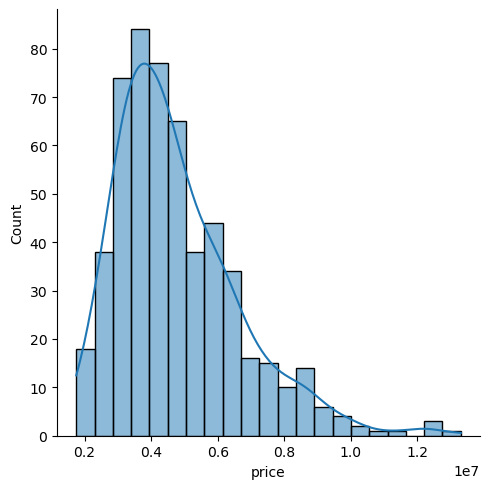

In [46]:
sns.displot(data=house_dataset, x='price', kde=True)

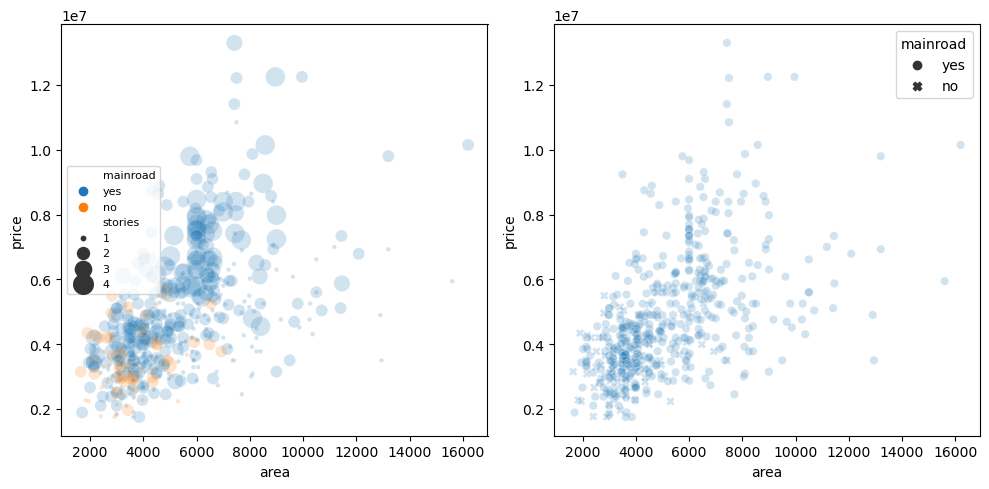

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.scatterplot(ax=axes[0], data=house_dataset, x='area', y='price', hue='mainroad', size="stories", sizes=(10, 200), alpha=0.2)
axes[0].legend(loc='center left', prop={'size': 8})
markers = {'no':'X', 'yes':'o'}
sns.scatterplot(ax=axes[1], data=house_dataset, x='area', y='price', style='mainroad', markers=markers, alpha=0.2)
plt.tight_layout()
plt.show()

## chech the null values

In [48]:
house_dataset.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## display the colu data

In [54]:
cols=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
le=LabelEncoder()
for col in cols:
    house_dataset[col]=le.fit_transform(house_dataset[col])

## Spreate X and y and train test.

In [55]:
X=house_dataset.drop('price',axis=1)
y=house_dataset['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Use leiner regration model

In [56]:
model=LinearRegression().fit(X_train,y_train)

## Product the result

In [57]:
predictions=model.predict(X_test)

## Visulaie the data

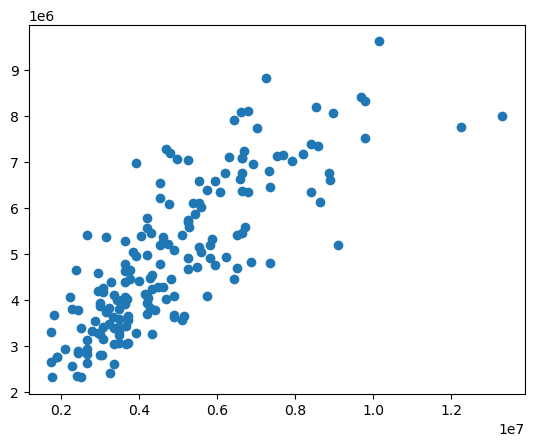

In [58]:
plt.scatter(y_test,predictions)
plt.show()

In [ ]:
predictions